# Regla Delta

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

Paso 2. Corre las siguientes funciones

In [3]:
def linear(z, derivative=False):
    a = z
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a

def logistic(z, derivative=False):
    a = 1 / (1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

Paso 2. Revisa el siguiente código de la regla delta

In [11]:
class neuron:
    
    def __init__(self,  n_inputs, activation_function=linear, learning_rate=0.1):
        # Aleatorios entre -1 y 1
        self.w = -1 + 2 * np.random.rand(n_inputs)
        self.b = -1 + 2 * np.random.rand()
        self.eta = learning_rate
        self.f = activation_function
        
    def predict(self, X):
        Z = np.dot(self.w, X) + self.b
        return self.f(Z)
    
    def train(self, X, Y, epochs=50):
        p = X.shape[1]
        for _ in range(epochs):
            
            # Propagacion ----------------------------------------------
            Z = np.dot(self.w, X) + self.b
            Y_est, dY = self.f(Z, derivative=True)
            
            # Entrenamiento --------------------------------------------
            
            # Calcular gradiente local
            lg = (Y - Y_est) * dY
            
            # Actualizar parámetros
            self.w += self.eta / p * (lg @ X.T).reshape(-1)
            self.b += self.eta / p * np.sum(lg)

Paso 4. Corre el siguiente ejemplo

[0.27248513 0.46233544 0.4366001  0.64017741]
[0.07982    0.28346425 0.27997771 0.63942767]


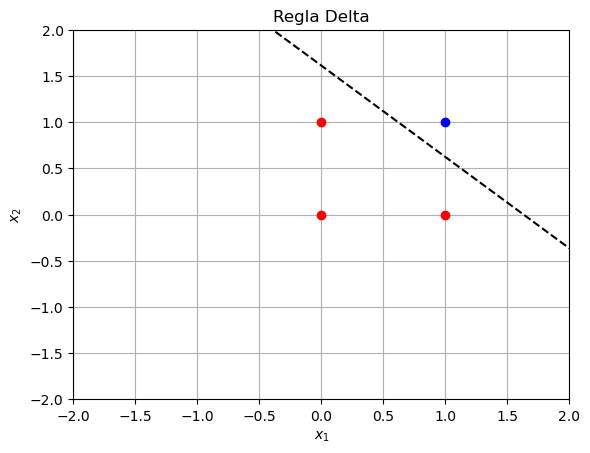

In [12]:
# EJemplo
X = np.array([[0, 0, 1, 1],
             [0, 1, 0, 1]])
Y = np.array([0, 0, 0, 1])

model = neuron(2, logistic, 1)
print(model.predict(X))
model.train(X, Y, epochs=100)
print(model.predict(X))

def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b 
  plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)],'--k')
    
# Primero dibujemos los puntos
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')
    
plt.title('Regla Delta')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
draw_2d_percep(model)
plt.show()

Paso 5. Corre este segundo ejemplo

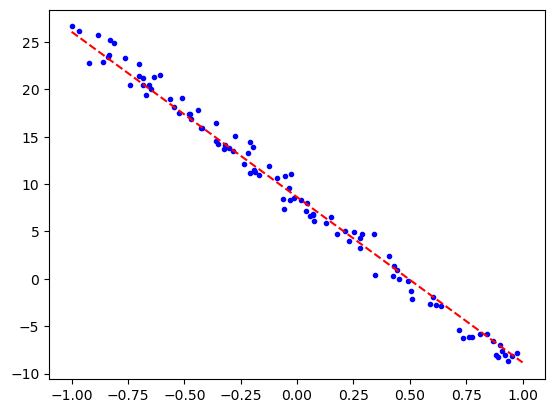

In [19]:
p = 100
x = -1 + 2 * np.random.rand(p).reshape(1, -1)
y = -18 * x + 6 + 2.5 + np.random.randn(p)
plt.plot(x, y, ".b")
model = neuron(1, linear, 0.1)
model.train(x, y, epochs=100)
xn = np.array([[-1, 1]])
plt.plot(xn.ravel(), model.predict(xn), '--r')